In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
student_df = pd.read_csv(f"C:\\Users\\DELL\\Downloads\\dev ansooriya\\student_data.csv")

In [3]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(f"data has{student_df.shape[0]} and rows has{student_df.shape[1]} columns")

data has395 and rows has33 columns


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
student_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
catcol = []
numcol = []
for i in student_df.columns:
    if student_df[i].dtype == 'object':
        catcol.append(i)
    else:
        numcol.append(i)

In [8]:
print("categorical columns:", catcol)
print("numerical columns:", numcol)

categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [9]:
student_df[catcol].describe().T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


In [10]:
for i in catcol:
    print (i)
    print(student_df[i].unique())
    print(student_df[i].value_counts())
    print("\n")

school
['GP' 'MS']
school
GP    349
MS     46
Name: count, dtype: int64


sex
['F' 'M']
sex
F    208
M    187
Name: count, dtype: int64


address
['U' 'R']
address
U    307
R     88
Name: count, dtype: int64


famsize
['GT3' 'LE3']
famsize
GT3    281
LE3    114
Name: count, dtype: int64


Pstatus
['A' 'T']
Pstatus
T    354
A     41
Name: count, dtype: int64


Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


Fjob
['teacher' 'other' 'services' 'health' 'at_home']
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


reason
['course' 'other' 'home' 'reputation']
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64


guardian
['mother' 'father' 'other']
guardian
mother    273
father     90
other      32
Name: count, dtype: int64


schoolsup
['yes' 'no']
schoolsup


In [11]:
numeric_df = student_df.select_dtypes(include=['number'])

In [12]:
numeric_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [13]:
sample_df = student_df.iloc[:,1:14]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

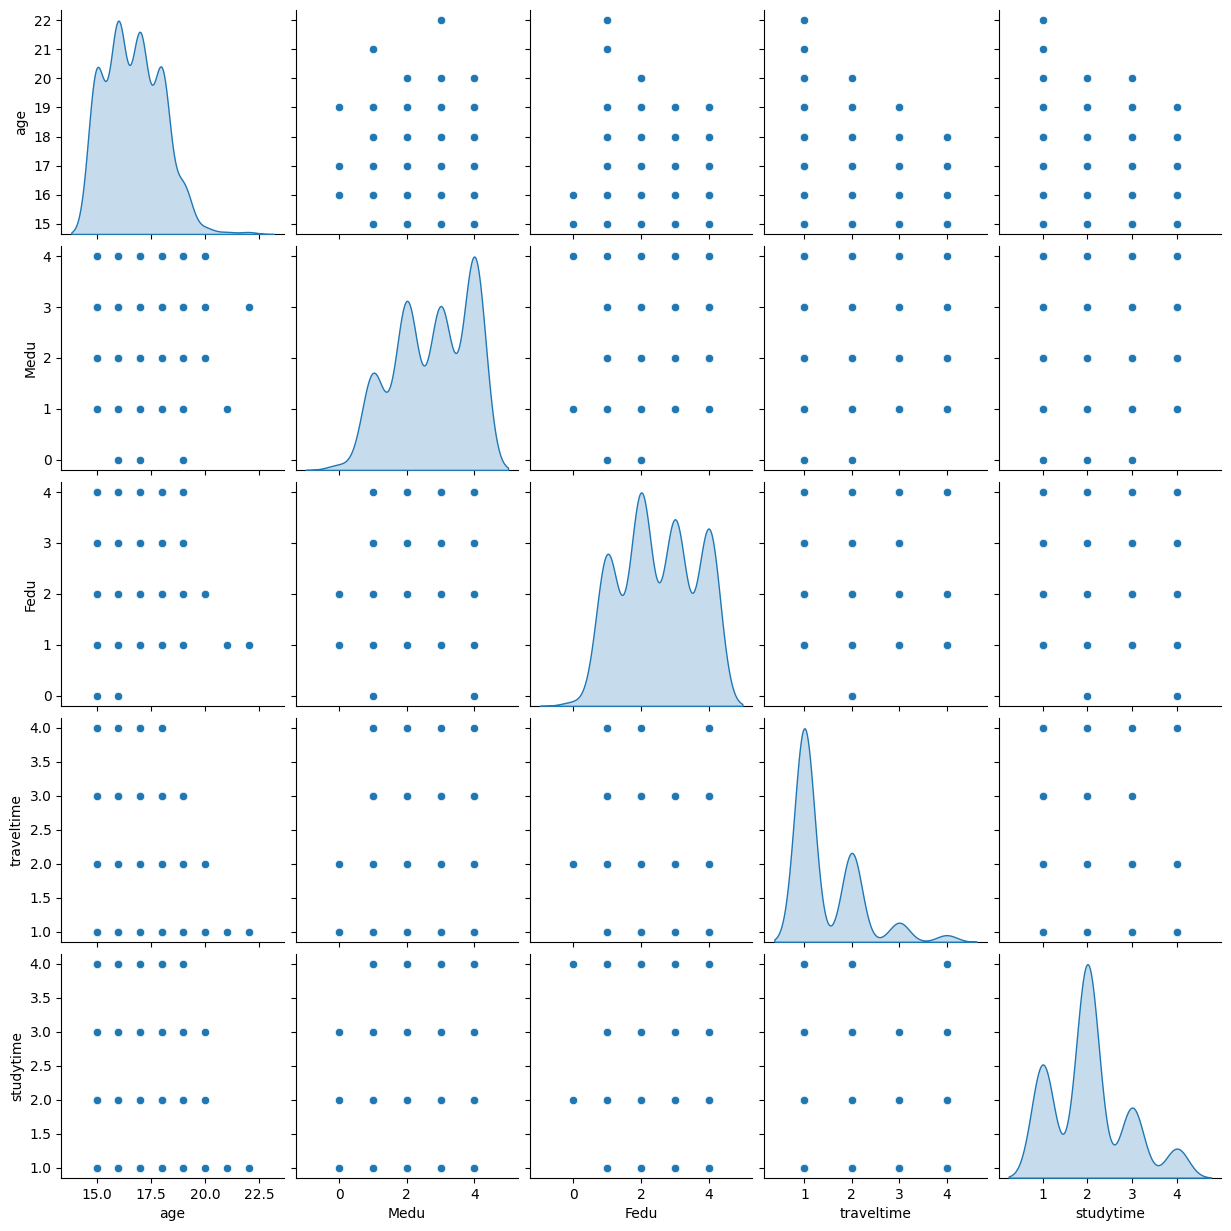

In [15]:
sns.pairplot(sample_df, diag_kind='kde')

<Axes: >

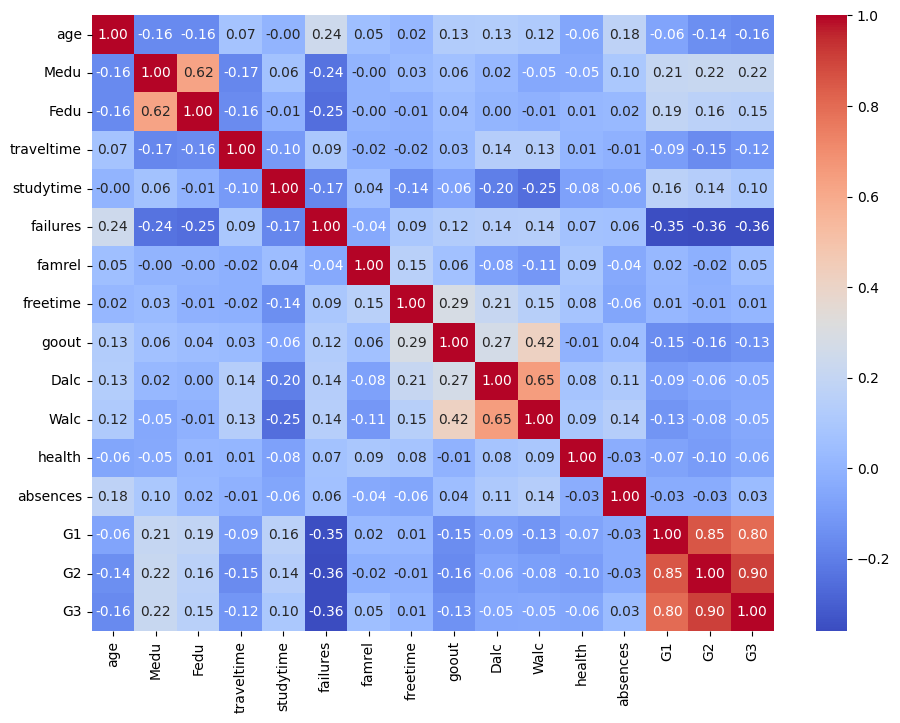

In [16]:
plt.figure(figsize=(11,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [17]:
student_df['pass_fail'] = student_df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [18]:
print(student_df['pass_fail'])

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: pass_fail, Length: 395, dtype: int64


In [19]:
x = student_df.drop(['G3', 'pass_fail'], axis=1)
y = student_df['pass_fail']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(316, 32) (79, 32) (316,) (79,)


In [22]:
cat_cols = x_train.select_dtypes(include='object').columns
print(cat_cols)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [23]:
X_train = pd.get_dummies(x_train, columns=cat_cols)
X_test = pd.get_dummies(x_test, columns=cat_cols)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(316, 32) (316,)
(79, 32) (79,)


In [25]:
import pandas as pd
scaler = StandardScaler()

In [26]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [27]:
log = LogisticRegression(class_weight='balanced', max_iter=500)
log.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [28]:
log_train_pred = log.predict(x_train_scaled)
log_pred = log.predict(x_test_scaled)

In [29]:
print("y_test:", y_test.shape)
print("log_pred:", log_pred.shape)

print("y_train:", y_train.shape)
print("log_train_pred:", log_train_pred.shape)

y_test: (79,)
log_pred: (79,)
y_train: (316,)
log_train_pred: (316,)


In [30]:
print("y_test class distribution:")
print(y_test.value_counts())
print("log_pred class distribution:")
print(pd.Series(log_pred).value_counts())

y_test class distribution:
pass_fail
1    53
0    26
Name: count, dtype: int64
log_pred class distribution:
1    48
0    31
Name: count, dtype: int64


In [31]:
print(classification_report(log_train_pred, y_train))
print(confusion_matrix(log_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       111
           1       0.96      0.99      0.97       205

    accuracy                           0.97       316
   macro avg       0.97      0.95      0.96       316
weighted avg       0.97      0.97      0.96       316

[[102   9]
 [  2 203]]


In [32]:
print(classification_report(log_pred, y_test))
print(confusion_matrix(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.85      0.94      0.89        48

    accuracy                           0.86        79
   macro avg       0.87      0.84      0.85        79
weighted avg       0.86      0.86      0.86        79

[[23  8]
 [ 3 45]]


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
var_char_label = ['Yes', 'No']

In [39]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=20, min_samples_split=22)

In [41]:
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=22)

In [42]:
y_predict = dt_model.predict(X_test)

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        26
           1       0.98      0.83      0.90        53

    accuracy                           0.87        79
   macro avg       0.86      0.90      0.87        79
weighted avg       0.90      0.87      0.88        79



In [45]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [47]:
print(classification_report(y_train, ytrain_predict))
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       104
           1       0.97      0.93      0.95       212

    accuracy                           0.93       316
   macro avg       0.92      0.93      0.92       316
weighted avg       0.93      0.93      0.93       316

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        26
           1       0.98      0.83      0.90        53

    accuracy                           0.87        79
   macro avg       0.86      0.90      0.87        79
weighted avg       0.90      0.87      0.88        79



In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
ytrain_proba = reg_dt_model.predict_proba(X_train)[:,1]
ytest_proba = reg_dt_model.predict_proba(X_test)[:,1]

In [53]:
auc_train = roc_auc_score(y_train, ytrain_proba)
auc_test = roc_auc_score(y_test, ytest_proba)

In [54]:
print("Training AUC:", auc_train)
print("Training AUC:", auc_test)

Training AUC: 0.9800662191582002
Training AUC: 0.9441219158200291


In [55]:
fpr_train, tpr_train,_ = roc_curve(y_train, ytrain_proba)
fpr_test, tpr_test,_ = roc_curve(y_test, ytest_proba)

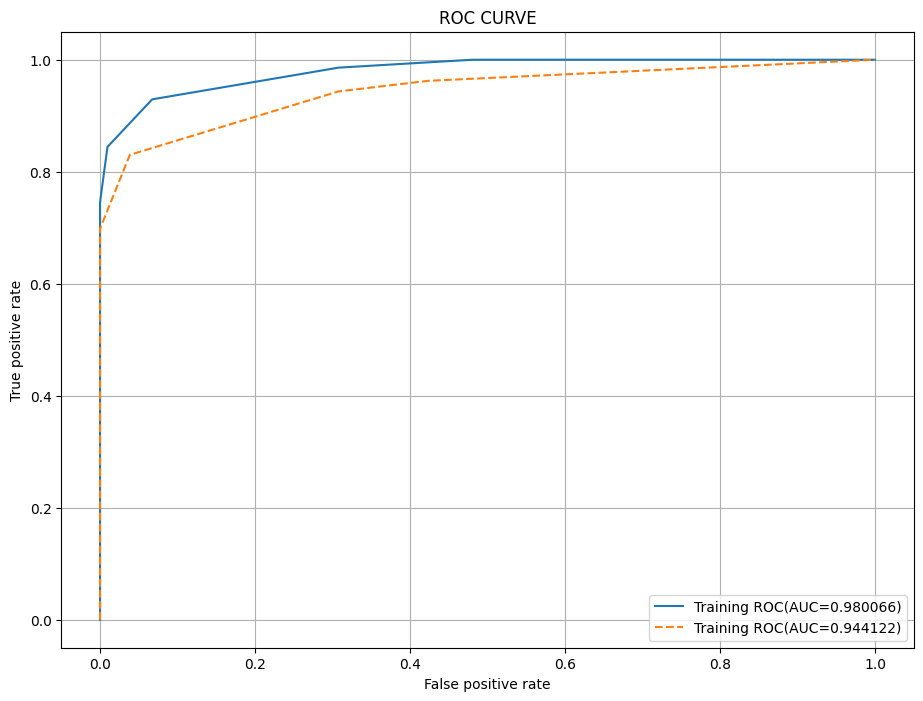

In [57]:
plt.figure(figsize=(11,8))
plt.plot(fpr_train, tpr_train, label=f'Training ROC(AUC={auc_train:2f})')
plt.plot(fpr_test, tpr_test, label=f'Training ROC(AUC={auc_test:2f})', linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.grid()
plt.legend()
plt.show()